In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [67]:
df = pd.read_csv("../data/raw/autos.csv")
df.head()

,Precio (ARS),Marca,Modelo,Versión,Año,KM,Color,Combustible,Puertas,Transmisión,Motor,Carrocería,Ubicación
0,21098030,Fiat,Cronos,1.3 Attractive Mt,2023,0,Blanco,Nafta,4,Automática,1.3,Sedán,Ezeiza - Bs.As. G.B.A. Sur
1,21098029,Fiat,Cronos,1.3 Attractive Mt,2023,0,Negro,Nafta,4,Automática,1.3,Sedán,Berazategui - Bs.As. G.B.A. Sur
2,18327000,Smart,Fortwo,1.0 City,2016,50000,Rojo,Nafta,3,Manual,1.0,Coupé,Capital Federal - Capital Federal
3,21098028,Fiat,Cronos,1.3 Attractive Mt,2023,0,Blanco,Nafta,4,Automática,1.3,Sedán,Lanús - Bs.As. G.B.A. Sur
4,26900000,Chevrolet,Cruze,1.4 Lt At Sedan,2023,17169,Plateado,Nafta,4,Automática,1.4,Sedán,Pilar - Bs.As. G.B.A. Norte


### Información general sobre el dataset

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Precio (ARS)  337 non-null    int64 
 1   Marca         337 non-null    object
 2   Modelo        337 non-null    object
 3   Versión       337 non-null    object
 4   Año           337 non-null    int64 
 5   KM            337 non-null    int64 
 6   Color         337 non-null    object
 7   Combustible   337 non-null    object
 8   Puertas       337 non-null    int64 
 9   Transmisión   337 non-null    object
 10  Motor         337 non-null    object
 11  Carrocería    337 non-null    object
 12  Ubicación     337 non-null    object
dtypes: int64(4), object(9)
memory usage: 34.4+ KB


### Estadísticas descriptivas

In [69]:
df.describe()

,Precio (ARS),Año,KM,Puertas
count,3.370000e+02,337.000000,337.000000,337.000000
mean,2.587593e+07,2020.139466,54385.706231,4.540059
std,2.347143e+07,4.400502,53552.730500,0.658527
min,3.690000e+06,2003.000000,0.000000,2.000000
25%,1.389900e+07,2017.000000,1000.000000,4.000000
50%,2.091000e+07,2021.000000,46000.000000,5.000000
75%,3.104000e+07,2024.000000,93000.000000,5.000000
max,2.766270e+08,2025.000000,260000.000000,5.000000


### Revisar valores nulos

In [70]:
df.isnull().sum()

Precio (ARS)    0
Marca           0
Modelo          0
Versión         0
Año             0
KM              0
Color           0
Combustible     0
Puertas         0
Transmisión     0
Motor           0
Carrocería      0
Ubicación       0
dtype: int64

### Quitar Outliers

In [71]:
# Calcular el IQR para la columna de Precio
Q1 = df['Precio (ARS)'].quantile(0.25)  # Primer cuartil
Q3 = df['Precio (ARS)'].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango Intercuartílico

# Definir límites inferior y superior para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar los datos para mantener solo los que están dentro de los límites
df_cleaned = df[(df['Precio (ARS)'] >= lower_limit) & (df['Precio (ARS)'] <= upper_limit)]

# Ver el número de filas antes y después de eliminar los outliers
print(f"Filas originales: {df.shape[0]}")
print(f"Filas después de eliminar outliers: {df_cleaned.shape[0]}")

Filas originales: 337
Filas después de eliminar outliers: 315


### Corregir columna "Motor"

In [72]:
# Habia String en algunos valores de "Motor" (por ejemplo: Motor 1.0 nafta Turbo 116cv 160 Nm => 1.0 Cilindrada)
df_cleaned.loc[:, 'Cilindrada'] = df_cleaned['Motor'].str.extract(r'(\d+\.\d+|\d+)')


C:\Users\joaquin\AppData\Local\Temp\ipykernel_13320\3195031886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'Cilindrada'] = df_cleaned['Motor'].str.extract(r'(\d+\.\d+|\d+)')


## Guardar data_cleaned

In [73]:
df_cleaned.to_csv("../data/processed/cleaned_cars_data.csv", index=False)

# Gráficos

### Distribución de precios

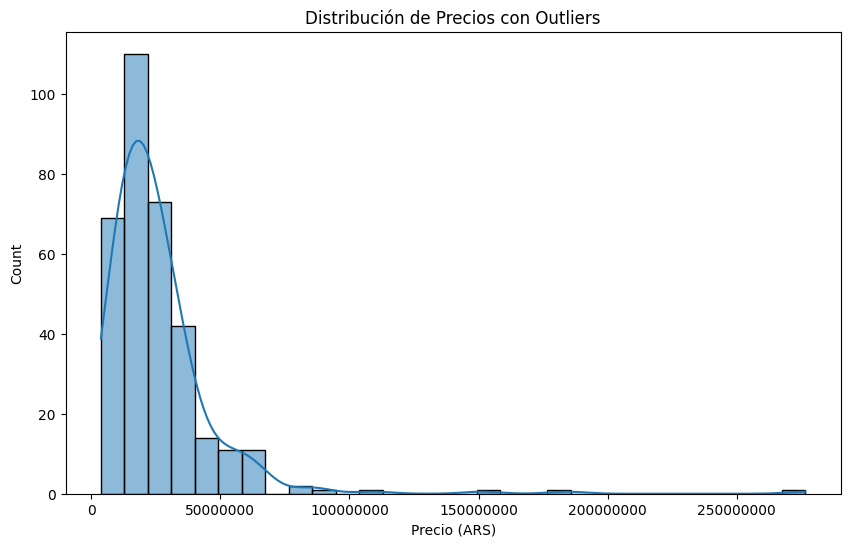

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Precio (ARS)'], bins=30, kde=True)
plt.title("Distribución de Precios con Outliers")

# Ajustar formato de los ejes para no usar notación científica
plt.ticklabel_format(style='plain', axis='x')  # Eje X
plt.ticklabel_format(style='plain', axis='y')  # Eje Y

plt.show()

##### (Se pueden observar los outliers claramente)

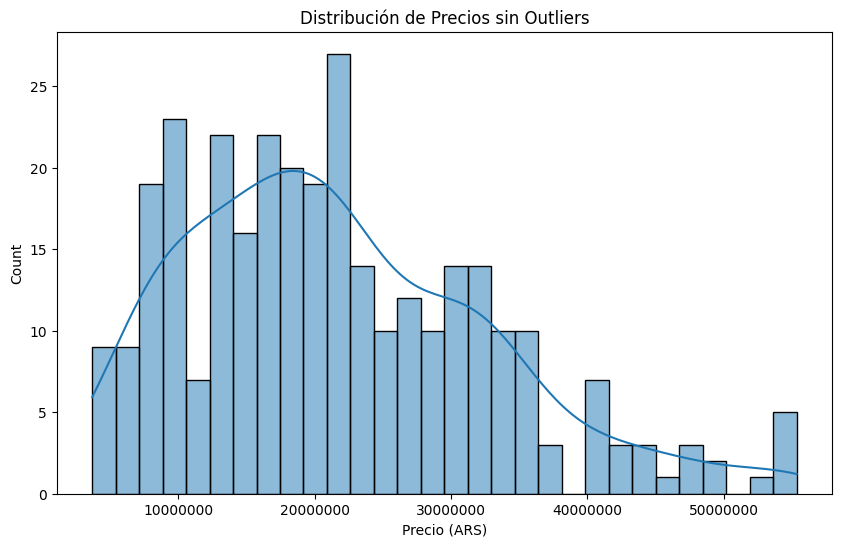

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Precio (ARS)'], bins=30, kde=True)
plt.title("Distribución de Precios sin Outliers")

# Ajustar formato de los ejes para no usar notación científica
plt.ticklabel_format(style='plain', axis='x')  # Eje X
plt.ticklabel_format(style='plain', axis='y')  # Eje Y

plt.show()

### Boxplot para ver outliers en "KM" y "Precio"

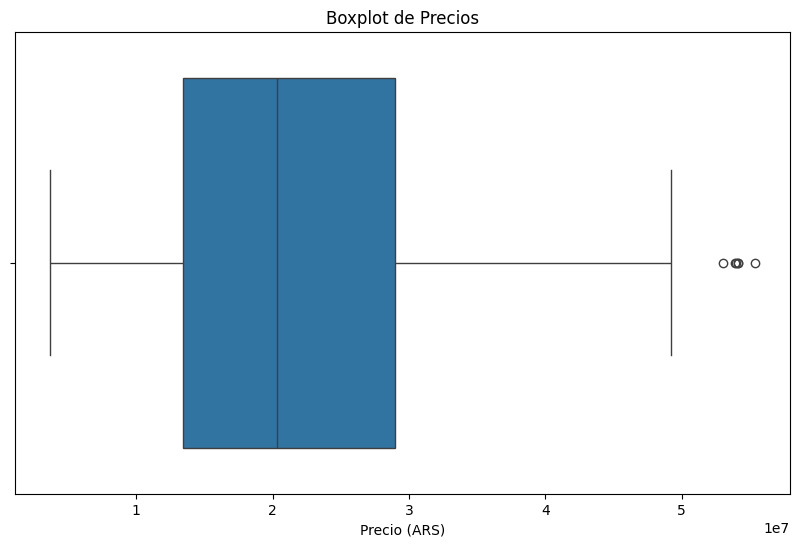

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['Precio (ARS)'])
plt.title("Boxplot de Precios")
plt.show()


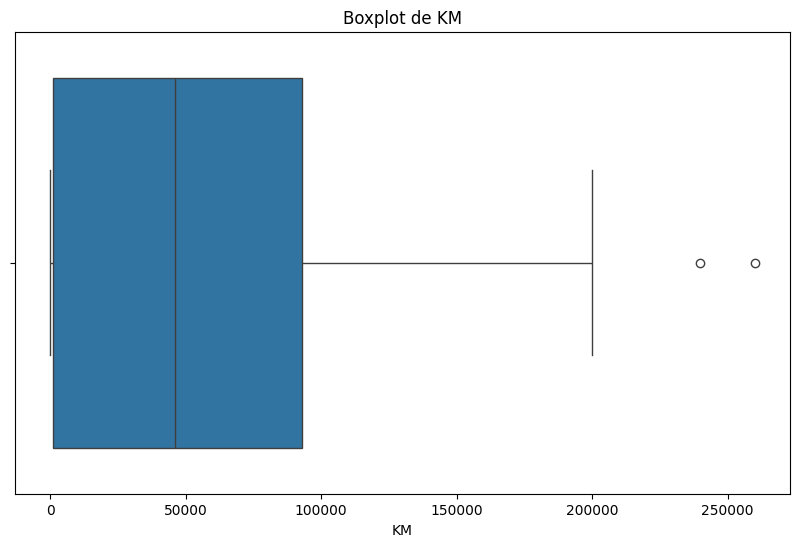

In [77]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['KM'])
plt.title("Boxplot de KM")
plt.show()

##### (Los km y precios quedaron sin outliers)

### Relación entre "KM" y "Precio"

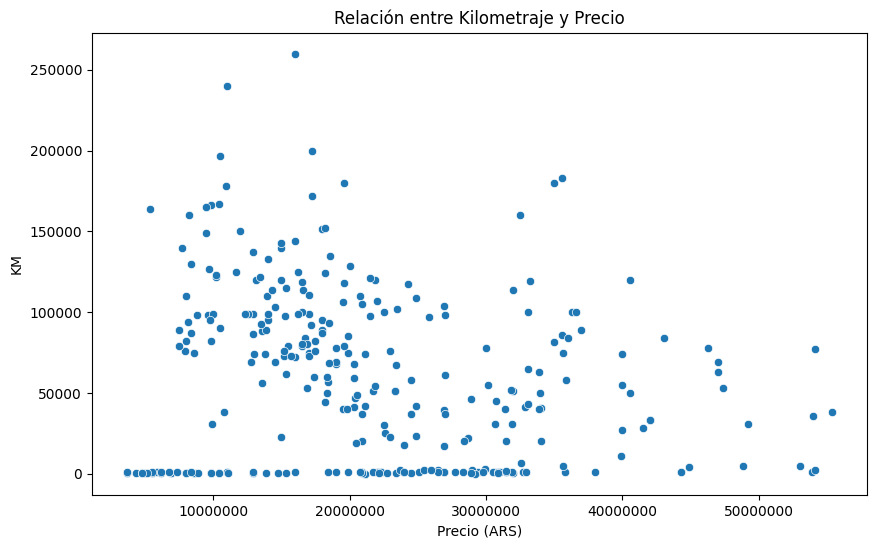

In [78]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Precio (ARS)', y='KM', data=df_cleaned)
plt.title("Relación entre Kilometraje y Precio")
plt.ticklabel_format(style='plain', axis='x')  # Eje X
plt.show()